# Data Description
It includes 2822 images.
Weed are annotated in YOLO v5 PyTorch format.

The following pre-processing was applied to each image:

Auto-orientation of pixel data (with EXIF-orientation stripping)
The following augmentation was applied to create 3 versions of each source image:

Equal probability of one of the following 90-degree rotations: none, clockwise, counter-clockwise
Random shear of between -15° to +15° horizontally and -15° to +15° vertically
Random brigthness adjustment of between -25 and +25 percent

 Info de data.yaml
 names: ['crop', 'weed']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

def contar_clases_en_carpeta(ruta_carpeta):
    contador_1 = 0
    contador_0 = 0

    archivos_txt = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith(".txt")]

    for archivo_txt in archivos_txt:
        ruta_completa = os.path.join(ruta_carpeta, archivo_txt)

        with open(ruta_completa, "r") as archivo:
            for linea in archivo:
                primer_caracter = linea.strip()[0]
                if primer_caracter == '1':
                    contador_1 += 1
                elif primer_caracter == '0':
                    contador_0 += 1

    return contador_1, contador_0, len(archivos_txt)

# Definir carpetas
carpeta_labels = "/content/drive/MyDrive/HUMAI Certificado Ciencia de Datos/WeedCrop/train/labels"
carpeta_labels_test = "/content/drive/MyDrive/HUMAI Certificado Ciencia de Datos/WeedCrop/test/labels"
carpeta_labels_valid = "/content/drive/MyDrive/HUMAI Certificado Ciencia de Datos/WeedCrop/valid/labels"

# Sumar contadores de las tres carpetas
contador_1_total = 0
contador_0_total = 0
total_archivos_total = 0

# Sumar contadores y archivos
contador_1_total += contar_clases_en_carpeta(carpeta_labels)[0]
contador_0_total += contar_clases_en_carpeta(carpeta_labels)[1]
total_archivos_total += contar_clases_en_carpeta(carpeta_labels)[2]

contador_1_total += contar_clases_en_carpeta(carpeta_labels_test)[0]
contador_0_total += contar_clases_en_carpeta(carpeta_labels_test)[1]
total_archivos_total += contar_clases_en_carpeta(carpeta_labels_test)[2]

contador_1_total += contar_clases_en_carpeta(carpeta_labels_valid)[0]
contador_0_total += contar_clases_en_carpeta(carpeta_labels_valid)[1]
total_archivos_total += contar_clases_en_carpeta(carpeta_labels_valid)[2]

# Imprimir el total
print("\nTotal de 'weed' boxes (total):", contador_1_total)
print("Total de 'croop' boxes (total):", contador_0_total)
print("Cantidad total imagenes (total):", total_archivos_total)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/HUMAI Certificado Ciencia de Datos/WeedCrop/train/labels'

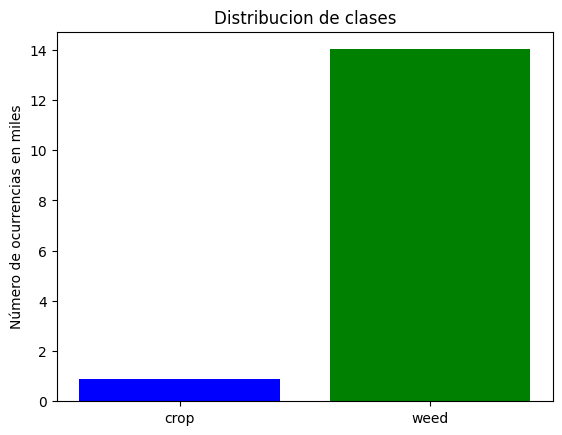

Cantidad de 'weed' detectadas: 14025
Cantidad de 'crop' detectadas: 894


In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
categorias = ['crop', 'weed']
valores = [contador_0_total/1000, contador_1_total/1000]
plt.bar(categorias, valores, color=['blue', 'green'])
plt.ylabel('Número de ocurrencias en miles')
plt.title('Distribucion de clases')

# Mostrar el gráfico
plt.show()
print(f"Cantidad de 'weed' detectadas: {contador_1}")
print(f"Cantidad de 'crop' detectadas: {contador_0}")

In [ ]:
import os
import pandas as pd

carpeta_labels = "/content/drive/MyDrive/HUMAI/Data_weed_crop/train/labels"

# Inicializar listas para almacenar los datos
clases = []
coordenadas_x = []
coordenadas_y = []
ancho = []
alto = []

# Obtener la lista de archivos en la carpeta
archivos_txt = [archivo for archivo in os.listdir(carpeta_labels) if archivo.endswith(".txt")]

# Leer cada archivo
for archivo_txt in archivos_txt:
    ruta_completa = os.path.join(carpeta_labels, archivo_txt)

    with open(ruta_completa, "r") as archivo:
        for linea in archivo:
            # Dividir la línea en sus componentes
            datos = linea.strip().split()

            # Verificar si la línea tiene el formato esperado
            if len(datos) == 5:
                clase, coord_x, coord_y, ancho_actual, alto_actual = datos
                clases.append(int(clase))  # Convertir la clase a entero
                coordenadas_x.append(float(coord_x))
                coordenadas_y.append(float(coord_y))
                ancho.append(float(ancho_actual))
                alto.append(float(alto_actual))

# Crear un DataFrame de pandas
data = {'Clase': clases, 'Coordenada_X': coordenadas_x, 'Coordenada_Y': coordenadas_y, 'Ancho': ancho, 'Alto': alto}
df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df)

       Clase  Coordenada_X  Coordenada_Y     Ancho      Alto
0          1      0.873047      0.029086  0.026690  0.041639
1          1      0.987276      0.306940  0.021961  0.028654
2          1      0.940102      0.578582  0.013395  0.036097
3          1      0.775772      0.872080  0.014149  0.027845
4          1      0.626927      0.643659  0.022811  0.049568
...      ...           ...           ...       ...       ...
12528      1      0.587367      0.738403  0.016717  0.033818
12529      1      0.584150      0.597882  0.019099  0.058867
12530      1      0.527969      0.594054  0.038547  0.033108
12531      1      0.559816      0.171000  0.020070  0.040860
12532      1      0.733852      0.181962  0.019524  0.024193

[12533 rows x 5 columns]


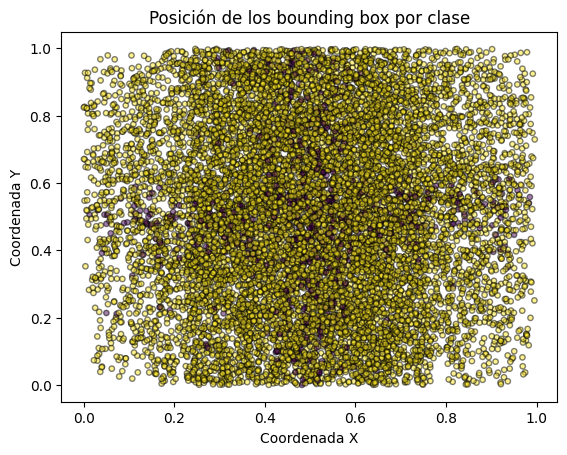

In [ ]:

import matplotlib.pyplot as plt

# Crear un scatter plot con un color diferente para cada clase
colors = df['Clase']
scatter = plt.scatter(df['Coordenada_X'], df['Coordenada_Y'], c=colors, alpha=0.5, edgecolors='k', s=15)

# Mapear etiquetas de leyenda para las clases
legend_labels = {0: 'Crop', 1: 'Weed'}
#legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i), markersize=15) for i in range(len(legend_labels))]
#plt.legend(legend_handles, [legend_labels[i] for i in df['Clase'].unique()], title='Clases')

# Agregar etiquetas y título
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Posición de los bounding box por clase')

# Mostrar el gráfico
plt.show()


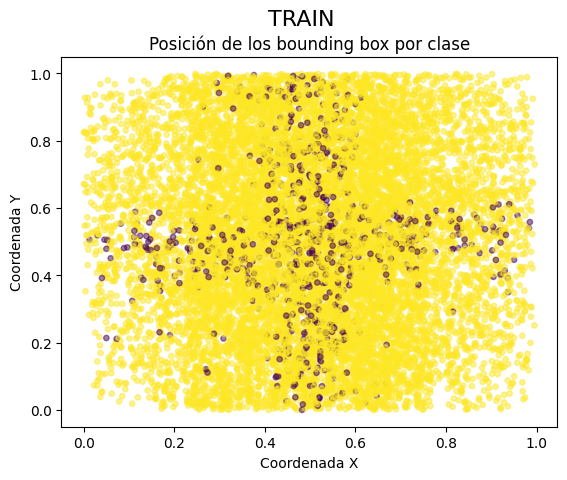

In [ ]:
import matplotlib.pyplot as plt

# Crear un scatter plot con un color diferente para cada clase
colors = df['Clase']
scatter = plt.scatter(df['Coordenada_X'], df['Coordenada_Y'], c=colors, alpha=0.5, s=15)

# Mapear etiquetas de leyenda para las clases
legend_labels = {0: 'Crop', 1: 'Weed'}
#legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i), markersize=15) for i in range(len(legend_labels))]
#plt.legend(legend_handles, [legend_labels[i] for i in df['Clase'].unique()], title='Clases')

# Agregar etiquetas y título
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Posición de los bounding box por clase')
plt.suptitle('TRAIN', fontsize=16)

# Mostrar el gráfico
plt.show()

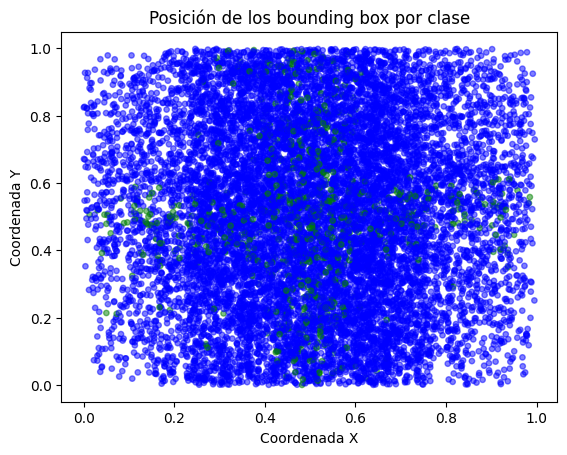

In [ ]:
import matplotlib.pyplot as plt

# Crear un scatter plot con puntos verdes y azules para cada clase
colors = ['green' if clase == 0 else 'blue' for clase in df['Clase']]
scatter = plt.scatter(df['Coordenada_X'], df['Coordenada_Y'], c=colors, alpha=0.5, s=15)

# Mapear etiquetas de leyenda para las clases
legend_labels = {0: 'Crop', 1: 'Weed'}
#legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i), markersize=15) for i in range(len(legend_labels))]
#plt.legend(legend_handles, [legend_labels[i] for i in df['Clase'].unique()], title='Clases')

# Agregar etiquetas y título
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Posición de los bounding box por clase')

# Mostrar el gráfico
plt.show()

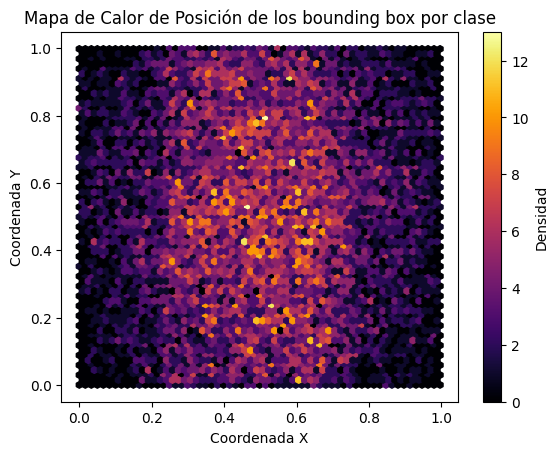

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de mapa de calor (hexbin) con un color diferente para cada clase
plt.hexbin(df['Coordenada_X'], df['Coordenada_Y'], gridsize=60, cmap='inferno')

# Agregar una barra de color para representar la densidad
plt.colorbar(label='Densidad')

# Agregar etiquetas y título
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Mapa de Calor de Posición de los bounding box por clase')

# Mostrar el gráfico
plt.show()

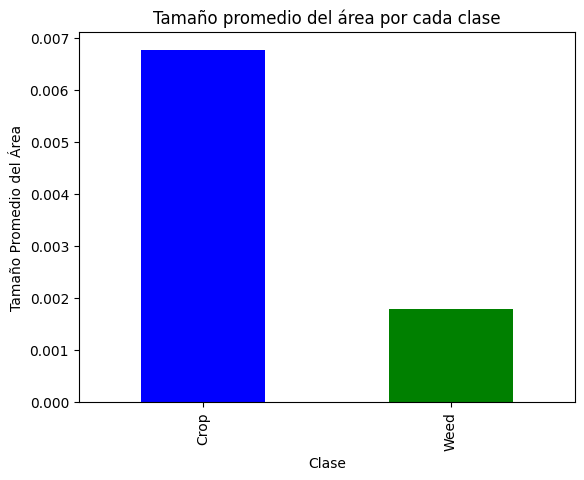

In [ ]:

# Calcular el área para cada fila
df['Area'] = df['Ancho'] * df['Alto']

# Mapear las clases a etiquetas específicas
df['Clase'] = df['Clase'].map({0: 'Crop', 1: 'Weed'})

# Crear un gráfico de barras para el área por cada clase
fig, ax = plt.subplots()
df.groupby('Clase')['Area'].mean().plot(kind='bar', color=['blue', 'green'], ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Clase')
ax.set_ylabel('Tamaño Promedio del Área de los bounding box')
plt.title('Tamaño promedio del área por cada clase')

# Mostrar el gráfico
plt.show()

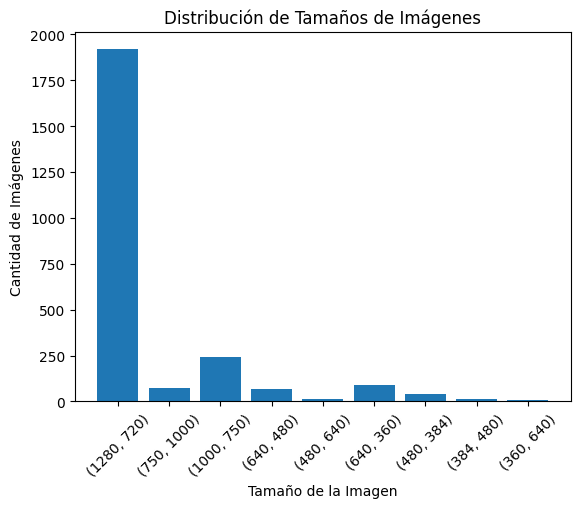

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def obtener_tamano_imagen(ruta_imagen):
    try:
        # Abrir la imagen con Pillow
        imagen = Image.open(ruta_imagen)

        # Obtener el tamaño de la imagen
        ancho, alto = imagen.size

        # Devolver el tamaño como una tupla (ancho, alto)
        return ancho, alto

    except Exception as e:
        print(f"Error al obtener el tamaño de la imagen {ruta_imagen}: {e}")
        return None

# Ruta de la carpeta que contiene las imágenes
carpeta_labels = "/content/drive/MyDrive/HUMAI Certificado Ciencia de Datos/WeedCrop/train/images"

# Obtener la lista de archivos en la carpeta
archivos_en_carpeta = os.listdir(carpeta_labels)

# Diccionario para almacenar tamaños y sus cantidades correspondientes
tamanos_con_cantidades = {}

# Iterar sobre los archivos y obtener los tamaños
for archivo in archivos_en_carpeta:
    ruta_imagen = os.path.join(carpeta_labels, archivo)
    tamano = obtener_tamano_imagen(ruta_imagen)
    if tamano:
        # Agregar el tamaño al diccionario y aumentar la cantidad
        if tamano in tamanos_con_cantidades:
            tamanos_con_cantidades[tamano] += 1
        else:
            tamanos_con_cantidades[tamano] = 1

# Crear listas separadas para tamaños y cantidades
tamaños, cantidades = zip(*tamanos_con_cantidades.items())

# Crear el gráfico de barras
plt.bar(range(len(tamaños)), cantidades, align='center')
plt.xticks(range(len(tamaños)), tamaños, rotation=45)
plt.xlabel('Tamaño de la Imagen')
plt.ylabel('Cantidad de Imágenes')
plt.title('Distribución de Tamaños de Imágenes')
plt.show()


In [ ]:
## Por cada clase
import os

def contar_clases_en_carpeta(ruta_carpeta):
    contador_1 = 0
    contador_0 = 0

    archivos_txt = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith(".txt")]

    for archivo_txt in archivos_txt:
        ruta_completa = os.path.join(ruta_carpeta, archivo_txt)

        with open(ruta_completa, "r") as archivo:
            for linea in archivo:
                primer_caracter = linea.strip()[0]
                if primer_caracter == '1':
                    contador_1 += 1
                elif primer_caracter == '0':
                    contador_0 += 1

    return contador_1, contador_0, len(archivos_txt)

# Definir carpeta
carpeta_labels = "/content/drive/MyDrive/HUMAI/Data_weed_crop/test/labels"

# Obtener contadores y cantidad total de archivos
contador_1_total, contador_0_total, total_archivos_total = contar_clases_en_carpeta(carpeta_labels)

# Imprimir el total
print("\nTotal de 'weed' boxes (total):", contador_1_total)
print("Total de 'crop' boxes (total):", contador_0_total)
print("Cantidad total de imágenes (total):", total_archivos_total)


Total de 'weed' boxes (total): 696
Total de 'crop' boxes (total): 85
Cantidad total de imágenes (total): 118


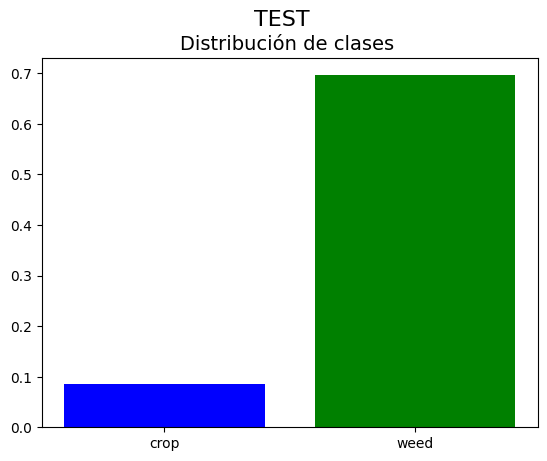

Cantidad de 'weed' detectadas: 696
Cantidad de 'crop' detectadas: 85


In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
categorias = ['crop', 'weed']
valores = [contador_0_total/1000, contador_1_total/1000]
plt.bar(categorias, valores, color=['blue', 'green'])
#plt.ylabel('Número de ocurrencias en miles')
plt.suptitle('TEST', fontsize=16)
plt.title('Distribución de clases ', fontsize=14)


# Mostrar el gráfico
plt.show()
print(f"Cantidad de 'weed' detectadas: {contador_1_total}")
print(f"Cantidad de 'crop' detectadas: {contador_0_total}")